# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**

---

---

## ✏️ **Cabeçalho**:



### **Nome**: Isabella Aparecida Costa Caselli

### **NUSP**: 13686685

### **Hash**: 67



---

## 📜 **Descrição:**



Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.



---

## ⚠️ **Instruções:**

- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.

- Comente seu código para facilitar a correção.

- Entregue o notebook no formato `.ipynb`.



---




## ✅ **Tarefas:**



1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`

2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`

3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`

4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`

5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`



---



<br>

<center>

        <h1>

        <b>

        BOA SORTE !!!

        </b>

        </h1>

</center>

<br>



---

---

## ⏳ Loading dos Dados

In [73]:
import pickle

import random

import numpy as np

import os

from os.path import join



# Configuração de seeds para replicabilidade

np.random.seed(42)  # Seed para NumPy

random.seed(42)     # Seed para o módulo random



input_path = os.getcwd()  # Obtém o diretório atual

images_filepath = join(input_path, 'MNIST-images.pkl')

labels_filepath = join(input_path, 'MNIST-labels.pkl')

validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')



with open(images_filepath, 'rb') as f:

    X_tot = pickle.load(f)



with open(labels_filepath, 'rb') as f:

    y_tot = pickle.load(f)



with open(validation_images_filepath, 'rb') as f:

    X_val = pickle.load(f)

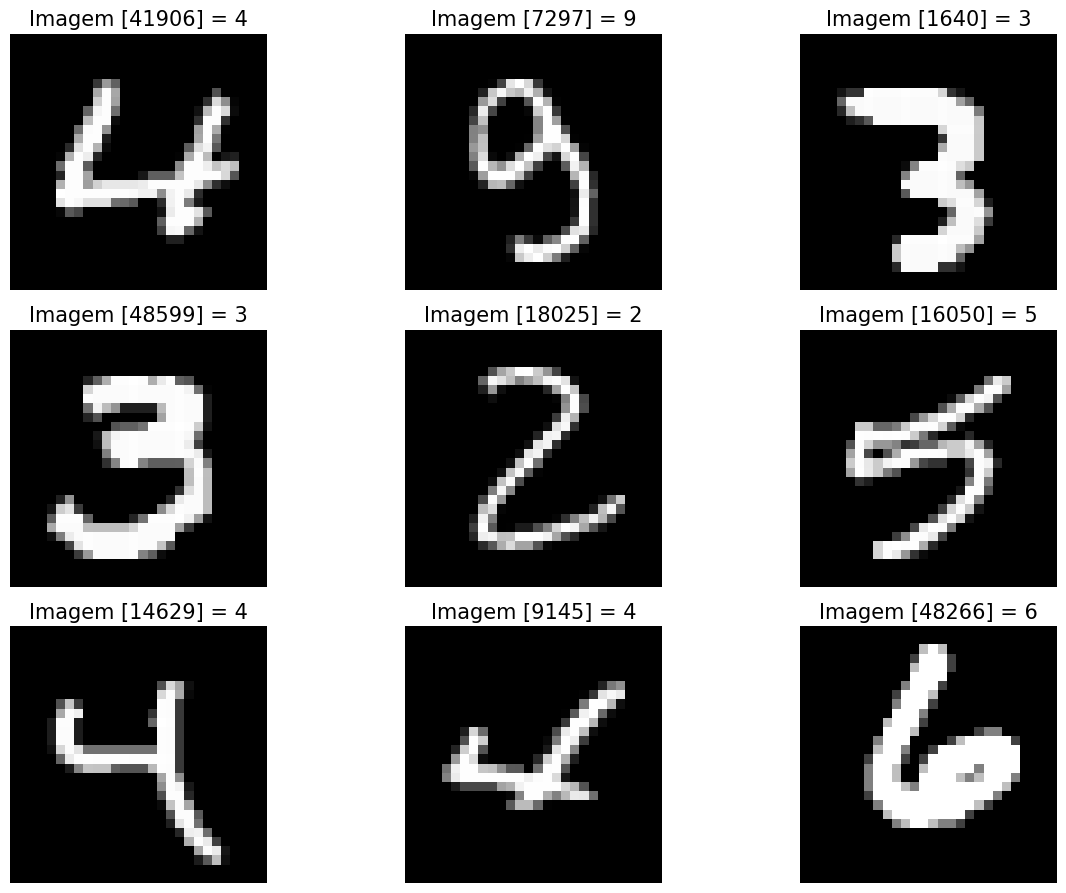

In [74]:
'''

TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO

Este bloco visualiza algumas imagens do dataset MNIST para verificar se o

carregamento foi realizado corretamente.

'''



%matplotlib inline

import random

import matplotlib.pyplot as plt



def show_images(images, title_texts):

    # Função para mostrar as imagens com seus respectivos títulos

    cols = 3  # Número de colunas na visualização

    rows = int(len(images) / cols) + 1  # Calcula o número de linhas

    plt.figure(figsize=(12, 12))  # Define o tamanho da figura

    index = 1

    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos

        image = x[0]

        title_text = x[1]

        plt.subplot(rows, cols, index)  # Adiciona um subplot

        plt.axis('off')  # Desativa os eixos

        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza

        if (title_text != ''):

            plt.title(title_text, fontsize=15)  # Define o título da imagem

        index += 1

    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos

    plt.show()  # Exibe a figura com as imagens e títulos



images_2_show = []  # Lista para armazenar as imagens a serem mostradas

titles_2_show = []  # Lista para armazenar os títulos das imagens

# Seleciona aleatoriamente 9 imagens de treino

for i in range(0, 9):

    r = random.randint(1, 60000)

    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista

    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente



show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas

In [75]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)



Descubra o número do Dataset associado ao seu Hash.


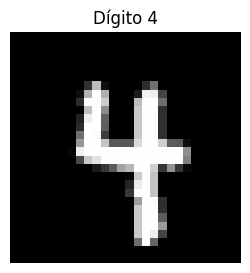

In [76]:
my_hash = 67

plt.figure(figsize=(3, 3))  

plt.imshow(X_tot[my_hash], cmap='gray')  

plt.axis('off')  

plt.title(f"Dígito {y_tot[my_hash]}", fontsize=12)  

plt.show() 

O dígito associado ao meu hash é 4

## 🔦 Item b)



Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

In [77]:
img = X_tot[my_hash]

n_bright_pixel = np.sum((img>=128) & (img<=255)) # range de pixels claros: (128, 255)

total_pixels = img.size # total de pixels



print(f"A probabilidade de um pixel claro é {100*(n_bright_pixel / total_pixels):.3f}%")

A probabilidade de um pixel claro é 12.755%


## ♟️ Item c)



Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

Para calcular essa probabilidade, devemos usar o terorema de Bayes, de forma que P(pixel claro | label = 4) = P(pixel claro e label = 4)/P(label = 4) 

In [78]:
imgs4 = X_tot[y_tot == 4] #filtrando imagens da mesma classe que meu hash

clear4 = np.sum((imgs4>=128) & (imgs4<=255)) #pixeis claros nas imagens de label 4

total_4 = imgs4.size #total de pixels das imagens com label 4

prob = clear4 / total_4

print(f"A probabilidade de um pixel ser claro dado que sua label é 4: {100*prob: .3f}%")

A probabilidade de um pixel ser claro dado que sua label é 4:  12.275%


## 📸 Item d)

Determine, qual é a probabilidade de um píxel claro, ser da mesma classe da sua imagem, dado que você está analisando todas as imagens no dataset MNIST

In [79]:
# pixels claros em todas as imagens do dataset

clear_pixels_all = np.sum((X_tot >= 128) & (X_tot <= 255))



# calculo da probabilidade, reaproveitando variaveis definidas no item c

prob = clear4 / clear_pixels_all





print(f'Probabilidade de um píxel claro ser da mesma classe da imagem {4}: {100*prob:.3f}%')

Probabilidade de um píxel claro ser da mesma classe da imagem 4: 9.128%


# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)



Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:



1. Todos os dígitos aparecem a mesma quantidade?



2. Qual o valor médio dos píxeis de cada dígito?

Classe 0: 5920 exemplos
Classe 1: 6725 exemplos
Classe 2: 6023 exemplos
Classe 3: 6107 exemplos
Classe 4: 5918 exemplos
Classe 5: 5376 exemplos
Classe 6: 5915 exemplos
Classe 7: 6238 exemplos
Classe 8: 5856 exemplos
Classe 9: 5922 exemplos


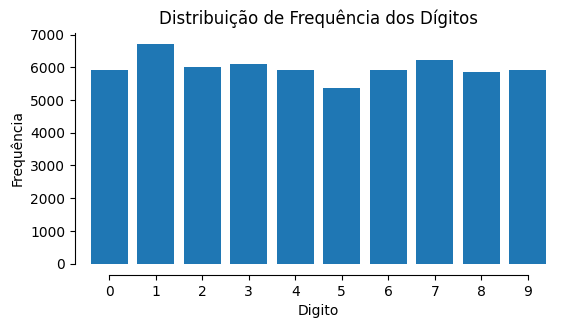

In [80]:
for i in range(10):

    num_i = np.sum(y_tot == i)

    print(f"Classe {i}: {num_i} exemplos")



digit_freq = np.bincount(y_tot) 



#plot da distribuição das frequencias

plt.figure(figsize=(6, 3))

plt.bar(range(10), digit_freq)

plt.title('Distribuição de Frequência dos Dígitos')

plt.xlabel('Digito')

plt.ylabel('Frequência')

ax = plt.gca()

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

ax.spines['left'].set_position(('outward', 8))

ax.spines['bottom'].set_position(('outward', 8))

ax.spines['bottom'].set_bounds(0, 9)



ax.set_xlim(left=-.5, right=9.5)

_ = plt.xticks(range(10))

2. Qual o valor médio dos píxeis de cada dígito?

A classe 0 possui valor médio de pixels 44.228
A classe 1 possui valor médio de pixels 19.403
A classe 2 possui valor médio de pixels 38.021


A classe 3 possui valor médio de pixels 36.232
A classe 4 possui valor médio de pixels 31.042
A classe 5 possui valor médio de pixels 32.924
A classe 6 possui valor médio de pixels 35.244
A classe 7 possui valor médio de pixels 29.256
A classe 8 possui valor médio de pixels 38.403
A classe 9 possui valor médio de pixels 31.340


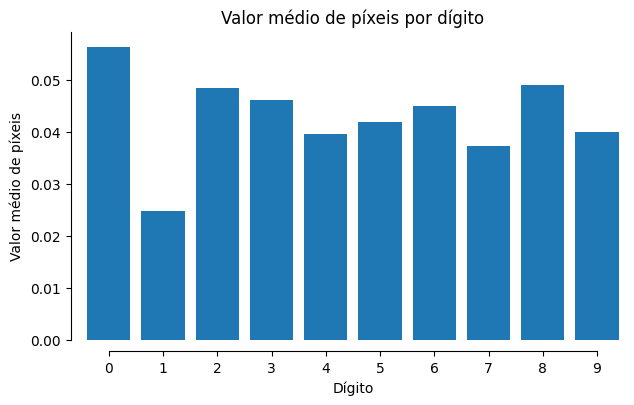

In [81]:
# média

for i in range(10):

    samples_i = np.mean(X_tot[(y_tot == i)])

    print(f"A classe {i} possui valor médio de pixels {samples_i:.3f}")



# calculo da média para cada digito (classe)

mean_pixels = np.array([np.mean(X_tot[y_tot == digit]) 

                        for digit in range(10)]) / X_tot[0].size



# plot dos valores

plt.figure(figsize=(7, 4))

plt.bar(range(10), mean_pixels)

plt.title('Valor médio de píxeis por dígito')

plt.xlabel('Dígito')

plt.ylabel('Valor médio de píxeis')

ax = plt.gca()

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

ax.spines['left'].set_position(('outward', 8))

ax.spines['bottom'].set_position(('outward', 8))

ax.spines['bottom'].set_bounds(0, 9)



ax.set_xlim(left=-.5, right=9.5)

_ = plt.xticks(range(10))

### Resposta 01: 

Não, podemos ver que os números não são exatamente iguais. No entanto, o gráfico acima nos mostra que as frequências não variam muito. Note que a distribuição se assemelha a uma distribuição uniforme.

### Resposta 02:

Plotada acima

## 📏 Item b)



Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


In [82]:
img_by_class = []



for i in range(10):

    img_by_class.append(X_tot[(y_tot == i)].flatten())

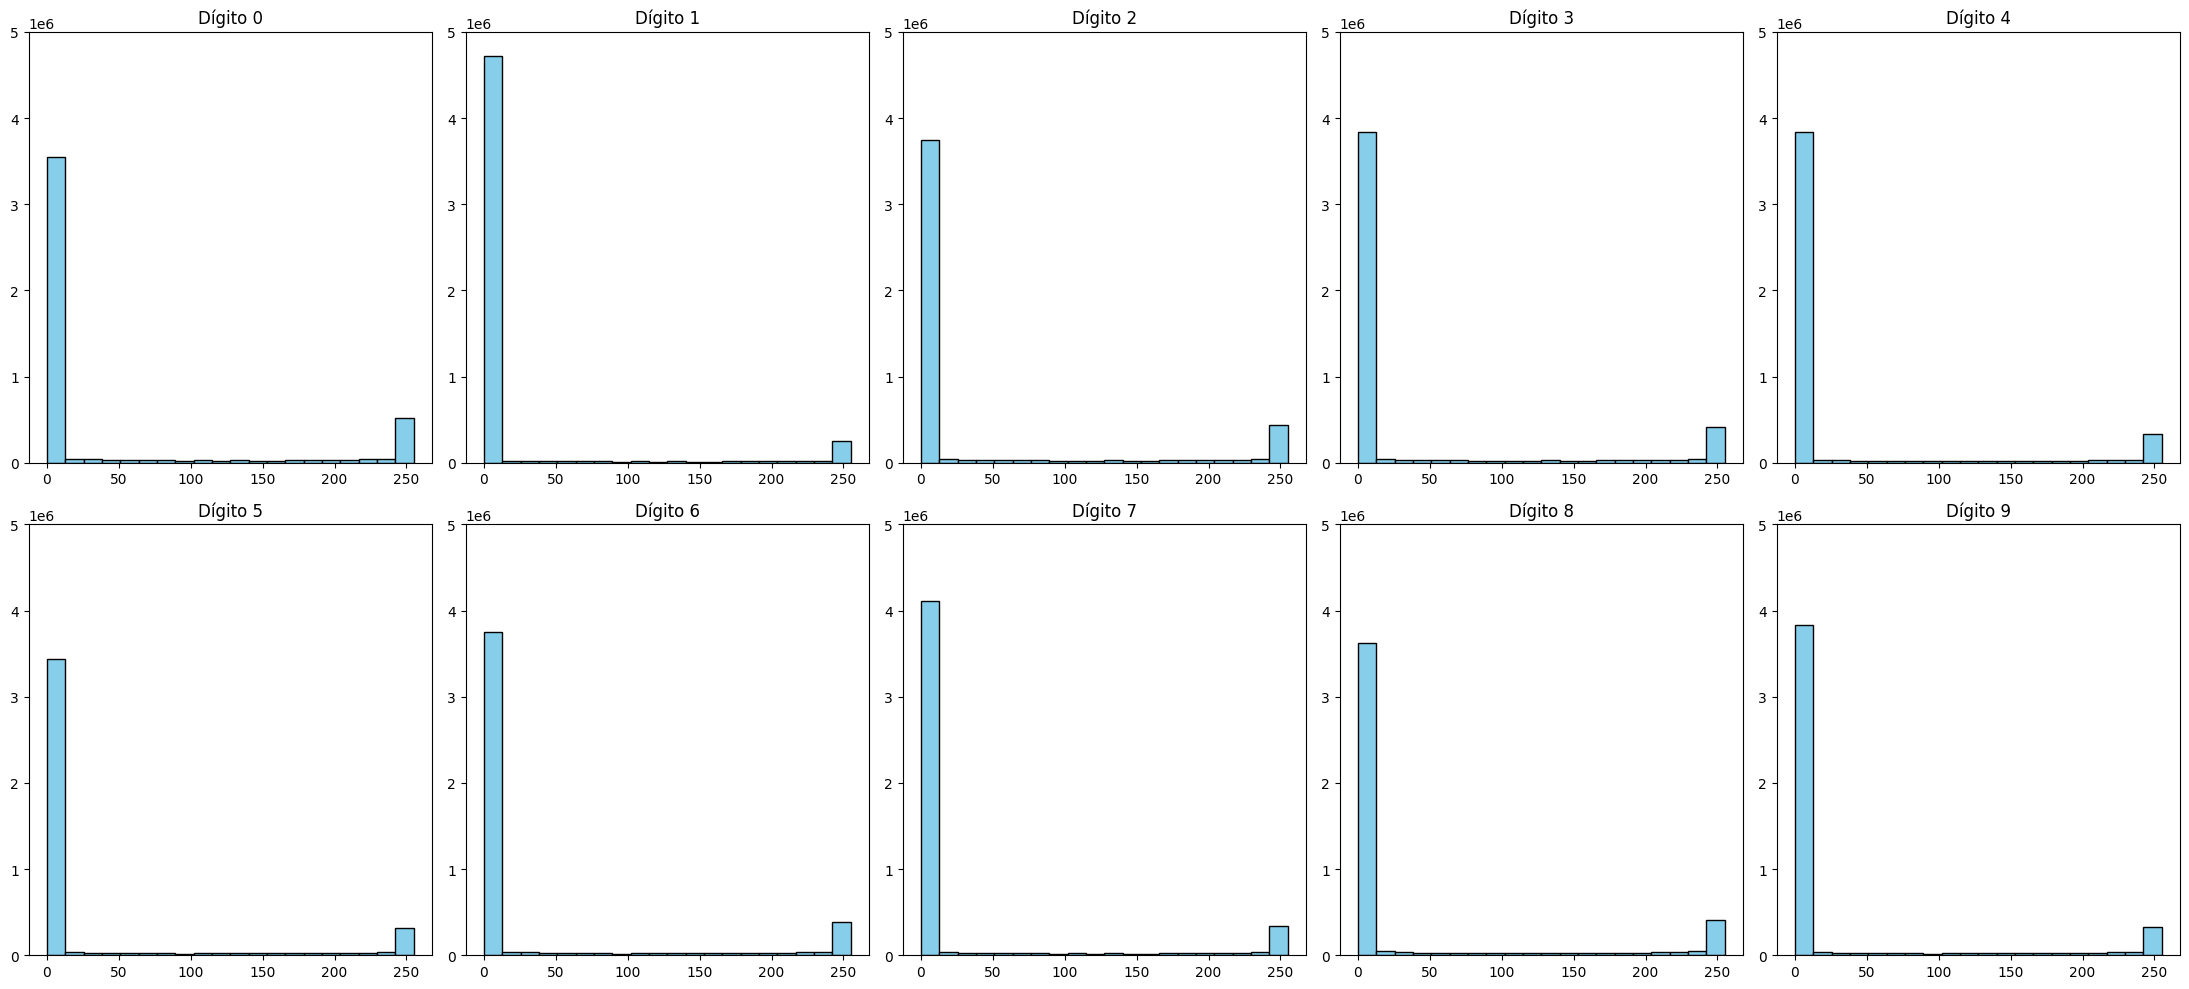

In [83]:
fig, axes = plt.subplots(2, 5, figsize=(22, 10))



for i, data in enumerate(img_by_class):

        ax = axes[i // 5, i % 5]  # acessar posição certa na grade

        ax.hist(data, bins=20, color='skyblue', edgecolor='black')

        ax.set_title(f"Dígito {i}")

        ax.set_ylim(0,5e6)

        

plt.tight_layout()  #espaçamento 

plt.show()

Podemos ver um padrão recorrente: diversos valores 0 e alguns valores 250. Ou seja, sim, há diversos valroes apagados.

## 🤓 Item c)



Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

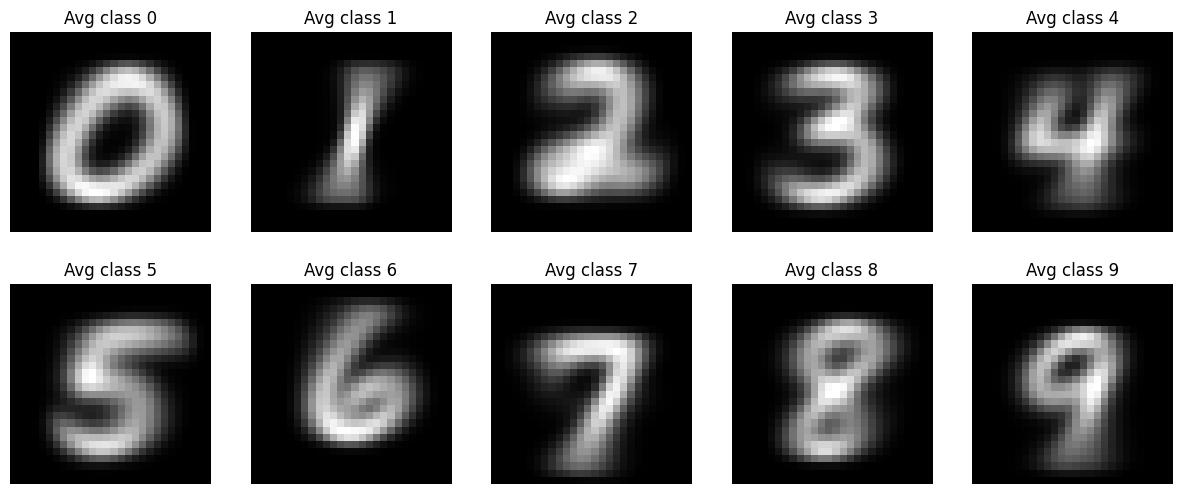

In [84]:
maean_imgs = []

for digit in range(10):

    digit_images = X_tot[y_tot == digit] #imagens de cada classe

    imagem_media = np.mean(digit_images, axis=0)

    maean_imgs.append(imagem_media)



fig, axes = plt.subplots(2, 5, figsize=(15, 6))

axes = axes.ravel()



for idx, imagem_media in enumerate(maean_imgs):

    axes[idx].set_title(f'Avg class {idx}')

    axes[idx].imshow(imagem_media.reshape(28, 28), cmap='gray')

    axes[idx].axis('off')

   

Conseguimos reconhecer os dígitos, apesar de as novas imagens ficarem um pouco "borradas", o que era esperado pela sobreposição de diversas imagens no cálculo da média.

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## 📈 Item a)



Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:



- Input Layer: 784 entradas (28x28);

- Hidden Layer 1: 8 neurônios;

- Hidden Layer 2: 8 neurônios;

- Output Layer: 10 saídas; (Classificador 0-9)

- Treine com 10 épocas.

Pirmeiro, vamos separar os dados entre treino e validação

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X_tot.reshape(-1, 28 * 28) / 255, y_tot, test_size=10000, random_state=42)

Agora, vamos treinar o primeiro modelo

In [89]:
ANN_a= MLPClassifier(hidden_layer_sizes=(8, 8),

                     solver='adam', 

                     random_state=1, 

                     max_iter=5,

                     warm_start=True,

                     early_stopping=False)



ANN_a.fit(X_train, y_train)

/home/isacaselli/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=5, random_state=1,
              warm_start=True)

In [90]:
pred = ANN_a.predict(X_train)

print(f"Acurácia de Treino: {accuracy_score(y_train, pred)}")



pred_val_annA = ANN_a.predict(X_val)

print(f"Acurácia de Validação: {accuracy_score(y_val, pred_val_annA)}")

Acurácia de Treino: 0.9048
Acurácia de Validação: 0.8971


## 📉 Item b)



Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.



- Input Layer: 784 entradas (28x28);

- Hidden Layer 1: 256 neurônios;

- Hidden Layer 2: 256 neurônios;

- Hidden Layer 3: 256 neurônios;

- Hidden Layer 4: 256 neurônios;

- Output Layer: 10 saídas; (Classificação 0-9)

- Treine com 20 épocas.

In [91]:
ANN_b = MLPClassifier(solver='adam', 

                     alpha=1e-5, 

                     hidden_layer_sizes=(256, 256, 256, 256), 

                     random_state=1, 

                     max_iter=20,

                     warm_start=True,

                     early_stopping=False)



ANN_b.fit(X_train, y_train)

/home/isacaselli/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(256, 256, 256, 256), max_iter=20,
              random_state=1, warm_start=True)

In [92]:
pred = ANN_b.predict(X_train)

print(f"Acurácia de Treino: {accuracy_score(y_train, pred)}")



pred_val_annB = ANN_b.predict(X_val)

print(f"Acurácia de Validação: {accuracy_score(y_val, pred_val_annB)}")

Acurácia de Treino: 0.99756
Acurácia de Validação: 0.9779


## ⚙️ Item c)



Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.



Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

In [93]:
grid_params = {"solver": ["adam"], 

        "alpha" : [1e-5], 

        "hidden_layer_sizes" : [(256, 128, 64, 32), (128, 64, 32, 16), (64, 32, 16), (32, 16, 8), (16, 8)],

        "random_state" : [1], "max_iter" : [20],

        }

In [94]:
mlp_instance = MLPClassifier(random_state=1)

search_grid = GridSearchCV(mlp_instance, grid_params, n_jobs = -1, cv=3, scoring="accuracy")

search_grid.fit(X_train, y_train)

/home/isacaselli/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/isacaselli/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/isacaselli/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/isacaselli/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/isacaselli/.local/lib/python3.

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1), n_jobs=-1,
             param_grid={'alpha': [1e-05],
                         'hidden_layer_sizes': [(256, 128, 64, 32),
                                                (128, 64, 32, 16), (64, 32, 16),
                                                (32, 16, 8), (16, 8)],
                         'max_iter': [20], 'random_state': [1],
                         'solver': ['adam']},
             scoring='accuracy')

In [113]:
ANN_c = search_grid.best_estimator_

ANN_c.set_params(max_iter=1, warm_start=True, early_stopping=False)

best_params = search_grid.best_params_



print("Melhores hiperparâmetros: \n", best_params)

Melhores hiperparâmetros: 
 {'alpha': 1e-05, 'hidden_layer_sizes': (256, 128, 64, 32), 'max_iter': 20, 'random_state': 1, 'solver': 'adam'}


In [96]:
train_accy = []

val_accy = []



train_losses = []

val_losses = []



#cálculo de dados que serão em itens abaixo

for i in range(20):

    ANN_c.partial_fit(X_train, y_train, classes = [k for k in range(10)])

    

    pred_train = ANN_c.predict(X_train)

    train_losses.append(ANN_c.loss_)

    train_accy.append(accuracy_score(y_train, pred_train))

    

    pred_val = ANN_c.predict_proba(X_val)

    val_losses.append(log_loss(y_val, pred_val, labels=[k for k in range(10)]))

    val_accy.append(accuracy_score(y_val, np.argmax(pred_val, axis=1)))

    

In [97]:
pred = ANN_c.predict(X_train)

print(f"Acurácia de Treino: {accuracy_score(y_train, pred)}")



pred_val_annC = ANN_c.predict(X_val)

print(f"Acurácia de Validação: {accuracy_score(y_val, pred_val_annC)}")

Acurácia de Treino: 0.99776
Acurácia de Validação: 0.9758


## 🔧 Item d)



Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


Vamos analisar a curva de aprendizado dos modelos, que nos fornece bons insumos para analisar overfitting e underfitting.

In [98]:
def grafico_acuracia_comparativo_treino_val(model_configs, X_train, y_train, X_val, y_val):

    classes = np.unique(y_train)

    fig, axes = plt.subplots(1, len(model_configs), figsize=(15, 5), sharey=True)



    for i, (titulo, model, epochs) in enumerate(model_configs):

        train_accuracy = []

        val_accuracy = []



        # Treinamento por época

        for _ in range(epochs):

            model.partial_fit(X_train, y_train, classes=classes)

            

            # Fazendo a previsão

            y_pred_train = model.predict(X_train)

            y_pred_val = model.predict(X_val)



            train_accuracy.append(accuracy_score(y_train, y_pred_train))

            val_accuracy.append(accuracy_score(y_val, y_pred_val))



        # Gráfico no subplot correspondente

        axes[i].plot(range(1, epochs + 1), train_accuracy, marker='o', label='Treino')

        axes[i].plot(range(1, epochs + 1), val_accuracy, marker='o', label='Validação')

        axes[i].set_title(f"Acurácia {titulo}")

        axes[i].set_xlabel('Época')

        axes[i].set_ylabel('Acurácia')

        axes[i].legend()

        axes[i].grid(True)



    plt.tight_layout()

    plt.show()


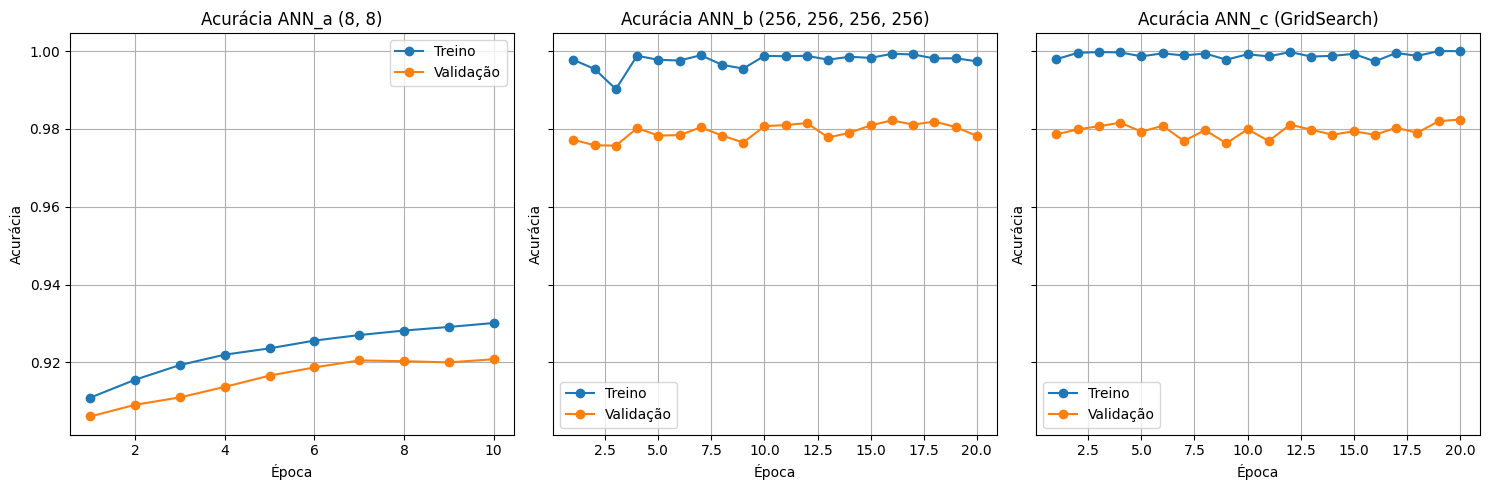

In [99]:
model_configs = [

    ("ANN_a (8, 8)", ANN_a, 10),

    ("ANN_b (256, 256, 256, 256)", ANN_b, 20),

    ("ANN_c (GridSearch)", ANN_c, 20)

]



# Chamando a função

grafico_acuracia_comparativo_treino_val(model_configs, X_train, y_train, X_val, y_val)


O modelo ANN_a apresenta uma acurácia de treino consideravelmente menor que os outros modelos, indicando que o modelo generaliza bem, mas sofre de underfitting leve. 



Já o ANN_b claraamente apresenta overfitting, com uma acurácia de treino praticamente perfeita (~100%), mas validação reduzida. 



Por fim, o modelo ANN_c também apresenta acurácia de treino muito alta (~100%) e validação mais baixa. Embora aparenta ter um desempenho levemente melhor que o ANN_b, ainda exibe overfitting. 



Dessa forma, o ANN_c parece o modelo mais equilibrado, enquanto o ANN_a pode ser ajustado para maior desempenho e o ANN_b e ANN_c poderiam ter redução na complexidade para evitar overfitting.

In [100]:
print("Métricas de classificação para ANN_a")

print(classification_report(y_val, pred_val_annA))

Métricas de classificação para ANN_a
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       997
           1       0.94      0.96      0.95      1158
           2       0.91      0.87      0.89      1007
           3       0.89      0.86      0.87      1028
           4       0.89      0.88      0.89       966
           5       0.85      0.83      0.84       885
           6       0.91      0.94      0.92       945
           7       0.92      0.92      0.92      1070
           8       0.86      0.85      0.85       988
           9       0.83      0.89      0.86       956

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [101]:
print("Métricas de classificação para ANN_b")

print(classification_report(y_val, pred_val_annB))

Métricas de classificação para ANN_b
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       997
           1       0.99      0.99      0.99      1158
           2       0.98      0.98      0.98      1007
           3       0.98      0.95      0.97      1028
           4       0.98      0.98      0.98       966
           5       0.96      0.98      0.97       885
           6       0.98      0.99      0.99       945
           7       0.97      0.98      0.98      1070
           8       0.98      0.96      0.97       988
           9       0.95      0.98      0.96       956

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [102]:
print("Métricas de classificação para ANN_c")

print(classification_report(y_val, pred_val_annC))

Métricas de classificação para ANN_c
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       997
           1       0.99      0.98      0.99      1158
           2       0.95      0.99      0.97      1007
           3       0.99      0.93      0.96      1028
           4       0.99      0.98      0.98       966
           5       0.97      0.96      0.97       885
           6       0.99      0.99      0.99       945
           7       0.97      0.98      0.98      1070
           8       0.97      0.97      0.97       988
           9       0.95      0.98      0.97       956

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Analisando comparativamente as tabelas, vemos que o melhor modelo é o ANN_c

---

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)



Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

Vimos que o melhor modelo foi ANN_c, então vamos plotar as métricas relacionadas a ele

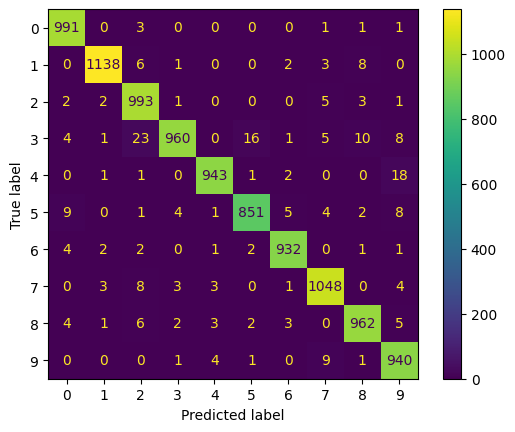

In [103]:
conf_mtx = confusion_matrix(y_val, pred_val_annC)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtx)

disp.plot()

In [104]:
print("Métricas de classificação para ANN_c")

print(classification_report(y_val, pred_val_annC))

Métricas de classificação para ANN_c
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       997
           1       0.99      0.98      0.99      1158
           2       0.95      0.99      0.97      1007
           3       0.99      0.93      0.96      1028
           4       0.99      0.98      0.98       966
           5       0.97      0.96      0.97       885
           6       0.99      0.99      0.99       945
           7       0.97      0.98      0.98      1070
           8       0.97      0.97      0.97       988
           9       0.95      0.98      0.97       956

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## 🐸 Item b)



Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

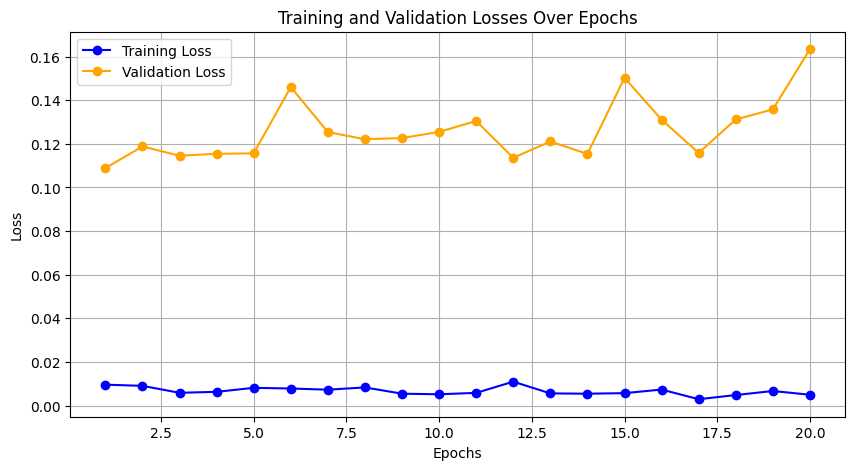

In [105]:
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))

plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')

plt.plot(epochs, val_losses, label='Validation Loss', color='orange', marker='o')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Training and Validation Losses Over Epochs')

plt.legend()

plt.grid(True)

plt.show()

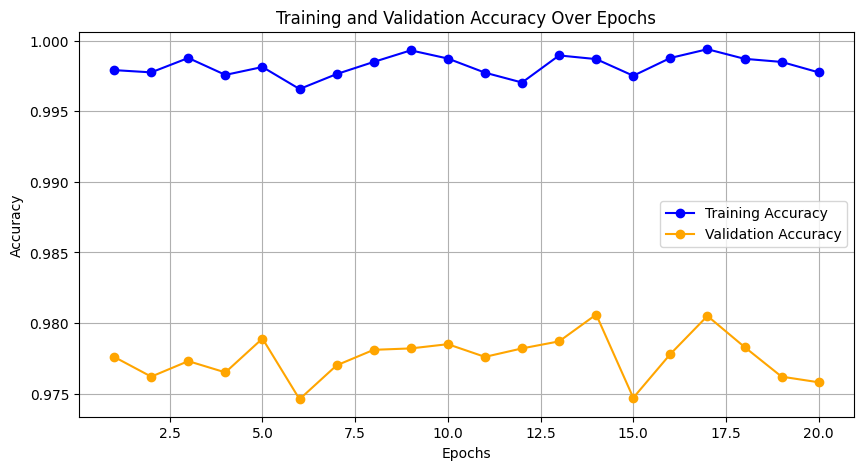

In [106]:
plt.figure(figsize=(10, 5))

plt.plot(epochs, train_accy, label='Training Accuracy', color='blue', marker='o')

plt.plot(epochs, val_accy, label='Validation Accuracy', color='orange', marker='o') 

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Training and Validation Accuracy Over Epochs')

plt.legend()

plt.grid(True)

plt.show()

## 🦖 Item c)



Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

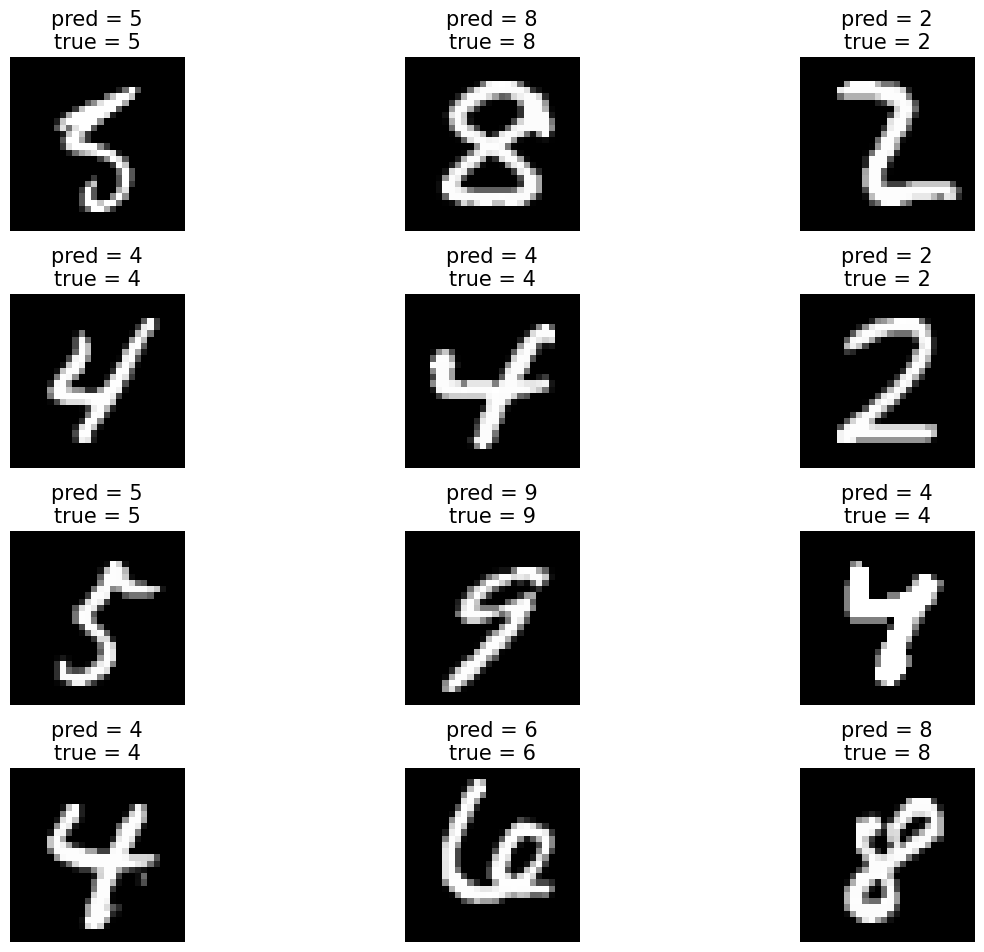

In [107]:
# previsões certas

X_val = X_val.reshape(-1, 28, 28)



X_right = X_val[y_val == pred_val_annC]

y_pred_right = pred_val_annC[y_val == pred_val_annC]

y_true_right = y_val[y_val == pred_val_annC]



show_images(X_right[:12], [f'pred = {y_pred_right[k]}\ntrue = {y_true_right[k]}' for k in range(12)])

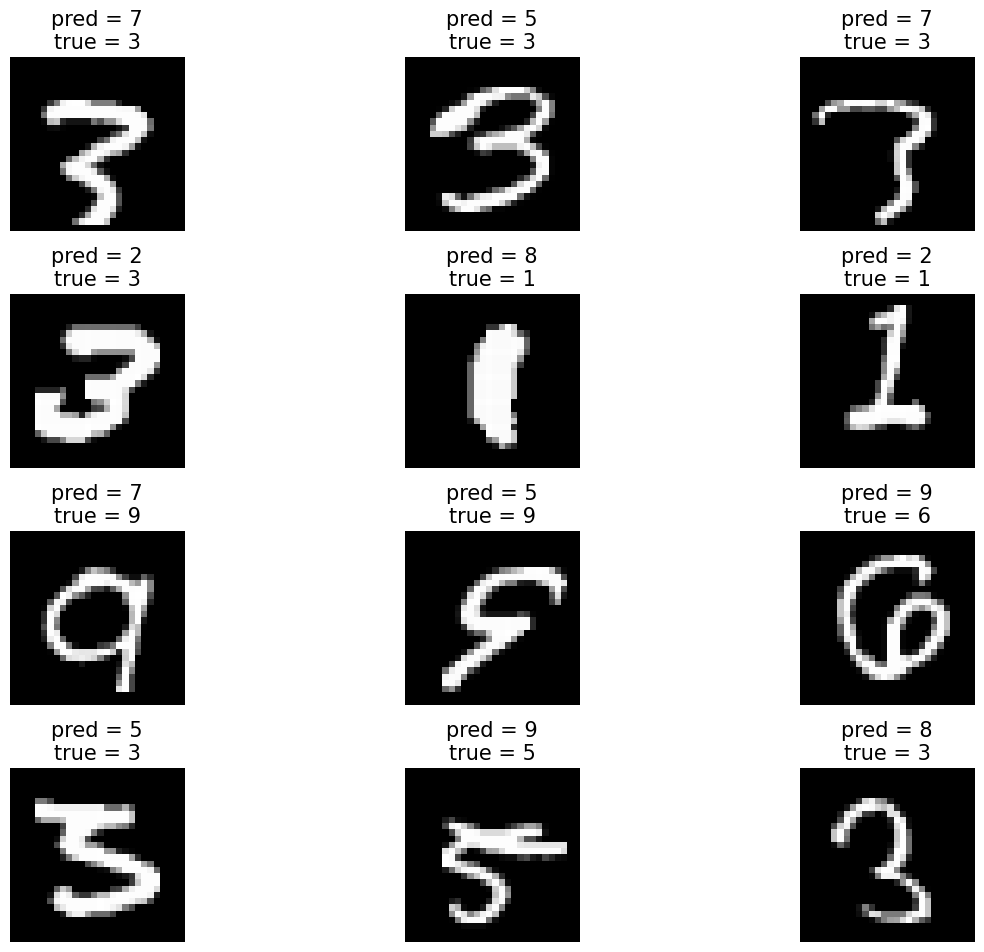

In [108]:
# previsões erradas

X_wrong = X_val[y_val != pred_val_annC]

y_pred_wrong = pred_val_annC[y_val != pred_val_annC]

y_true_wrong = y_val[y_val != pred_val_annC]

show_images(X_wrong[:12], [f'pred = {y_pred_wrong[k]}\ntrue = {y_true_wrong[k]}' for k in range(12)])

Nas imagens das previsões corretas, os dígitos tem a forma mais definida, parecida com a dos dígitos que conhecemos. 



Já para previsões erradas, podemos observar algumas coisas interessantes:



Na primeira imagem, o número 3 está distorcido na parte superior, se assemelhando com um dígito 7.

Na segunda imagem, o número está com a escrita muito grossa, de forma que sua forma não pode ser entendida corretamente.

E assim por diante.



Então, vemos que essas imagens estão de fato distorcidas, de forma que até um ser humano pode se confundir, então concluímos que a qualidade da escrito afeta diretamente o processo de decisão do modelo.

---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)



# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

## 🙏🏻 Item b)



# Lembre-se de documentar adequadamente seu código e conclusões!

Vamos treinar o modelo final que será submetido ao Kaggle

In [109]:
with open('MNIST-validation-images.pkl', 'rb') as f:

    X_test = pickle.load(f)

In [110]:
X_train = X_tot.reshape(-1,28 * 28) / 255

y_train = y_tot



ANN_final = MLPClassifier(

                solver='adam', 

                alpha=1e-5, 

                hidden_layer_sizes=(256, 128, 64, 32), 

                random_state=1, 

                max_iter=20, 

                early_stopping=False)



ANN_final.fit(X_train, y_train)

    

final_pred = ANN_final.predict(X_test.reshape(-1,28 * 28) / 255)

/home/isacaselli/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [111]:
df_kaggle = pd.DataFrame({'ID': np.arange(1,10001), 'Answer':final_pred})

df_kaggle.set_index("ID", inplace=True)

df_kaggle.head()

,Answer
ID,
1,8
2,4
3,8
4,7
5,7


In [112]:
df_kaggle.to_csv('submission.csv')